In [ ]:
import pandas as pd
import numpy

## Reading the dataset

In [ ]:
df = pd.read_csv("data_ivy-2.0.csv")
df.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,28,1,0,32,82,374,26,7,24,1.012346,926,0.166667,0,0.0,0.226337,0,0,31.642857,23,2.6786,1
1,6,1,2,3,7,3,2,1,4,0.600000,36,1.000000,0,0.0,0.444444,0,0,4.666667,1,0.6667,0
2,4,2,0,5,6,4,1,4,2,0.666667,21,1.000000,1,0.5,0.500000,0,0,4.000000,1,0.5000,0
3,4,1,0,9,4,6,9,0,4,2.000000,4,0.000000,0,0.0,0.666667,0,0,0.000000,1,1.0000,0
4,1,1,0,8,1,0,6,2,1,2.000000,1,0.000000,0,0.0,1.000000,0,0,0.000000,1,1.0000,0


In [ ]:
df.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,11.284091,1.792614,0.369318,13.232955,34.036932,131.579545,6.880682,5.164773,9.036932,1.059352,249.343750,0.616224,0.715909,0.290908,0.490831,0.357955,0.636364,18.489722,3.187500,1.214294,0.113636
std,15.148232,1.244773,1.318279,16.571085,44.679566,712.192029,13.938917,8.931273,12.636099,0.660123,428.259698,0.459940,1.441737,0.385164,0.254585,0.733601,1.781077,27.032755,3.848123,0.816136,0.317821
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.055223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,5.000000,6.000000,0.000000,1.000000,1.000000,2.000000,0.625000,20.000000,0.000000,0.000000,0.000000,0.299074,0.000000,0.000000,4.666667,1.000000,0.800000,0.000000
50%,6.000000,1.000000,0.000000,8.000000,19.000000,6.000000,3.000000,2.000000,5.000000,0.850000,85.500000,1.000000,0.000000,0.000000,0.444444,0.000000,0.000000,10.388199,2.000000,1.000000,0.000000
75%,13.000000,2.000000,0.000000,16.000000,40.000000,45.250000,6.000000,5.000000,11.000000,2.000000,267.000000,1.000000,1.000000,0.670918,0.666667,0.250000,0.250000,21.434615,4.000000,1.446925,0.000000
max,157.000000,6.000000,17.000000,150.000000,312.000000,11794.000000,147.000000,75.000000,142.000000,2.000000,2894.000000,1.000000,12.000000,1.000000,1.000000,4.000000,18.000000,203.500000,29.000000,6.500000,1.000000


In [ ]:


for i in range(len(df)):
    if df['bug'][i]!=0:
       df['bug'][i]=1
       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df['bug'].value_counts()

0    312
1     40
Name: bug, dtype: int64

In [ ]:
#df.drop(['name','version','name.1'], axis = 1,inplace=True)

In [ ]:
df.isnull().sum()

wmc       0
dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
bug       0
dtype: int64

Text(0, 0.5, 'Frequency')

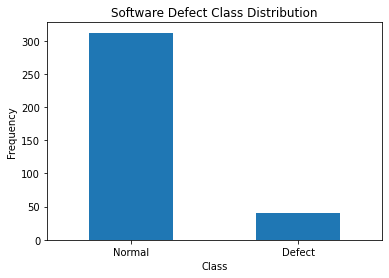

In [ ]:
import matplotlib.pyplot as plt 
count_classes = pd.value_counts(df['bug'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Software Defect Class Distribution")

LABELS = ["Normal", "Defect"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

## SMOTE

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X.shape


(352, 20)

In [ ]:
y.shape

(352,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 218, 1: 28}

In [ ]:
print(X_test)

[[  5.           1.           0.         ...  23.6          4.
    1.6       ]
 [ 11.           1.           0.         ...   7.27272727   2.
    0.9091    ]
 [  4.           1.           0.         ...   6.25         2.
    1.        ]
 ...
 [  2.           1.           0.         ...   0.           1.
    1.        ]
 [  4.           1.           0.         ... 107.5          1.
    0.75      ]
 [ 17.           3.           0.         ...  22.82352941   6.
    1.2353    ]]


In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
# logistic regression object
lr = LogisticRegression()
 
# train the model on train set
lr.fit(X_train, y_train.ravel())
 
predictions = lr.predict(X_train)
 
# print classification report
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       218
           1       0.67      0.29      0.40        28

    accuracy                           0.90       246
   macro avg       0.79      0.63      0.67       246
weighted avg       0.89      0.90      0.88       246



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,predictions))
print(recall_score(y_train,predictions))
print(precision_score(y_train,predictions))

0.9024390243902439
0.2857142857142857
0.6666666666666666


In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 218, 1: 28})
After Counter({0: 218, 1: 218})


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 28
Before OverSampling, counts of label '0': 218 

After OverSampling, the shape of train_X: (436, 20)
After OverSampling, the shape of train_y: (436,) 

After OverSampling, counts of label '1': 218
After OverSampling, counts of label '0': 218


In [ ]:
# logistic regression object
lr = LogisticRegression()
 
# train the model on train set
lr.fit(X_train_res, y_train_res)
 
predictions = lr.predict(X_train_res)
 
# print classification report
print(classification_report(y_train_res, predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       218
           1       0.84      0.82      0.83       218

    accuracy                           0.83       436
   macro avg       0.83      0.83      0.83       436
weighted avg       0.83      0.83      0.83       436



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_res,predictions))
print("Precision :",precision_score(y_train_res,predictions))
print("Recall :",recall_score(y_train_res,predictions))


0.8279816513761468
Precision : 0.8356807511737089
Recall : 0.8165137614678899


## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto',C=1.0)
clf.fit(X_train_res,y_train_res)
y_train_pred = clf.predict(X_train_res)
print("Training Accuracy:",accuracy_score(y_train_res,y_train_pred))

print("Training Precision:",precision_score(y_train_res,y_train_pred))
print("Training Recall:",recall_score(y_train_res,y_train_pred))

Training Accuracy: 0.8807339449541285
Training Precision: 0.8772727272727273
Training Recall: 0.8853211009174312


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_train_res)
print("Training Accuracy:",accuracy_score(y_train_res,y_pred))

print("Training Precision:",precision_score(y_train_res,y_pred))
print("Training Recall:",recall_score(y_train_res,y_pred))

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0


## CIR

In [ ]:
Dj = df[df['bug'] == 0]
D0 = df[df['bug']==1]

In [ ]:
D0.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,28,1,0,32,82,374,26,7,24,1.012346,926,0.166667,0,0.000000,0.226337,0,0,31.642857,23,2.6786,1
5,23,2,0,150,67,235,147,5,20,0.852273,653,0.750000,1,0.280000,0.280303,1,1,26.869565,9,1.8696,1
7,25,4,0,18,73,200,1,0,18,0.854167,666,1.000000,0,0.736264,0.380000,0,0,25.320000,13,1.9200,1
14,19,1,0,8,42,99,2,7,3,0.788889,329,1.000000,1,0.000000,0.263158,0,0,16.052632,5,1.5789,1
30,37,6,0,26,120,570,2,26,24,0.848765,1123,0.666667,0,0.825243,0.120120,4,18,29.108108,9,2.5676,1


In [ ]:
from __future__ import unicode_literals

In [ ]:
D0.to_csv(path_or_buf="hello.csv", sep=',',encoding='utf-8')  

In [ ]:
!cat hello.csv

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,28,1,0,32,82,374,26,7,24,1.012345679,926,0.166666667,0,0.0,0.226337449,0,0,31.64285714,23,2.6786,1
5,23,2,0,150,67,235,147,5,20,0.852272727,653,0.75,1,0.28,0.28030303,1,1,26.86956522,9,1.8696,1
7,25,4,0,18,73,200,1,0,18,0.854166667,666,1.0,0,0.736263736,0.38,0,0,25.32,13,1.92,1
14,19,1,0,8,42,99,2,7,3,0.7888888890000001,329,1.0,1,0.0,0.263157895,0,0,16.05263158,5,1.5789,1
30,37,6,0,26,120,570,2,26,24,0.848765432,1123,0.666666667,0,0.8252427179999999,0.12012012,4,18,29.10810811,9,2.5676,1
37,8,1,0,32,104,8,4,29,3,0.80952381,955,1.0,2,0.0,0.3125,0,0,118.0,4,1.5,1
58,35,4,0,16,103,429,0,0,28,0.8941176470000001,824,0.933333333,1,0.663366337,0.314285714,2,4,22.11428571,2,1.0,1
60,74,1,0,40,190,2181,13,30,72,0.8829908679999999,1443,1.0,8,0.0,0.067567568,0,0,18.17567568,6,1.4189,1
61,9,2,0,19,39,34,8,13,5,0.9375,178,0.5,1,0.3,0.328125,1,1,18.55555556,1,0.7778,1
73,15,4,0,13,64,57,0,0,14,0.821428570999

In [ ]:
D0.iloc[:,:-1].shape

(40, 20)

In [ ]:
C = D0.groupby('bug', as_index=False)["wmc"	,"dit",	"noc"	,"cbo"	,"rfc",	"lcom",	"ca",	"ce",	"npm"	,"lcom3",	"loc",	"dam",	"moa"	,"mfa"	,"cam",	"ic",	"cbm",	"amc",	"max_cc",	"avg_cc"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
temp = ["wmc"	,"dit",	"noc"	,"cbo"	,"rfc",	"lcom",	"ca",	"ce",	"npm"	,"lcom3",	"loc",	"dam",	"moa"	,"mfa"	,"cam",	"ic",	"cbm",	"amc",	"max_cc",	"avg_cc"]
len(temp)

20

In [ ]:
from scipy.spatial import distance

In [ ]:
dist = []
cols = []
for i in range(len(D0)):
  for j in range(0,20):
    eDistance = distance.euclidean(C[temp[j]],D0[temp[j]].iloc[i])
    dist.append(eDistance)
    cols.append([j,min(dist),i])


In [ ]:
min(dist)

0.0017341329749998025

In [ ]:
for i in range(len(dist)):
  if dist[i] == min(dist):
    print(i)

651


In [ ]:
x = D0['moa'].iloc[11]


In [ ]:
y = C['moa']

In [ ]:
eDistance = distance.euclidean(x,y)
print(eDistance)

1.7


In [ ]:
n = Dj.shape[0] - D0.shape[0]
print(n)

272


In [ ]:
import  random

In [ ]:
D0.shape

(40, 21)

In [ ]:
D0.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,28,1,0,32,82,374,26,7,24,1.012346,926,0.166667,0,0.000000,0.226337,0,0,31.642857,23,2.6786,1
5,23,2,0,150,67,235,147,5,20,0.852273,653,0.750000,1,0.280000,0.280303,1,1,26.869565,9,1.8696,1
7,25,4,0,18,73,200,1,0,18,0.854167,666,1.000000,0,0.736264,0.380000,0,0,25.320000,13,1.9200,1
14,19,1,0,8,42,99,2,7,3,0.788889,329,1.000000,1,0.000000,0.263158,0,0,16.052632,5,1.5789,1
30,37,6,0,26,120,570,2,26,24,0.848765,1123,0.666667,0,0.825243,0.120120,4,18,29.108108,9,2.5676,1


In [ ]:
import numpy

In [ ]:
scorer = D0.iloc[11]
print(numpy.array(scorer))

[  8.           1.           0.           3.          35.
  20.           2.           1.           4.           0.80952381
 303.           1.           0.           0.           0.35714286
   0.           0.          36.5          4.           1.25
   1.        ]


In [ ]:
tempscorer = numpy.array(scorer)
tempC = numpy.array(C)[0][1:]

In [ ]:
with open("hello.csv","a") as f:
  for i in range(13,n+13):
    l1 = []
    k = random.randint(0,1000)/1000
    for i in range(20):
        l1.append(tempscorer[i] + (k * tempC[i]))
    #   print(l1)
    f.write(",".join(str(v) for v in l1))
    f.write("\n")

In [ ]:
!cat hello.csv

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,28,1,0,32,82,374,26,7,24,1.012345679,926,0.166666667,0,0.0,0.226337449,0,0,31.64285714,23,2.6786,1
5,23,2,0,150,67,235,147,5,20,0.852272727,653,0.75,1,0.28,0.28030303,1,1,26.86956522,9,1.8696,1
7,25,4,0,18,73,200,1,0,18,0.854166667,666,1.0,0,0.736263736,0.38,0,0,25.32,13,1.92,1
14,19,1,0,8,42,99,2,7,3,0.7888888890000001,329,1.0,1,0.0,0.263157895,0,0,16.05263158,5,1.5789,1
30,37,6,0,26,120,570,2,26,24,0.848765432,1123,0.666666667,0,0.8252427179999999,0.12012012,4,18,29.10810811,9,2.5676,1
37,8,1,0,32,104,8,4,29,3,0.80952381,955,1.0,2,0.0,0.3125,0,0,118.0,4,1.5,1
58,35,4,0,16,103,429,0,0,28,0.8941176470000001,824,0.933333333,1,0.663366337,0.314285714,2,4,22.11428571,2,1.0,1
60,74,1,0,40,190,2181,13,30,72,0.8829908679999999,1443,1.0,8,0.0,0.067567568,0,0,18.17567568,6,1.4189,1
61,9,2,0,19,39,34,8,13,5,0.9375,178,0.5,1,0.3,0.328125,1,1,18.55555556,1,0.7778,1
73,15,4,0,13,64,57,0,0,14,0.821428570999

In [ ]:
D0 = pd.read_csv('hello.csv')
D0.shape

(312, 22)

In [ ]:
D0.head()

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0.0,28.0,1.0,0.0,32.0,82.0,374.0,26.0,7.0,24.0,1.012346,926.0,0.166667,0.0,0.000000,0.226337,0.0,0.0,31.642857,23.0,2.6786,1.0
1,5.0,23.0,2.0,0.0,150.0,67.0,235.0,147.0,5.0,20.0,0.852273,653.0,0.750000,1.0,0.280000,0.280303,1.0,1.0,26.869565,9.0,1.8696,1.0
2,7.0,25.0,4.0,0.0,18.0,73.0,200.0,1.0,0.0,18.0,0.854167,666.0,1.000000,0.0,0.736264,0.380000,0.0,0.0,25.320000,13.0,1.9200,1.0
3,14.0,19.0,1.0,0.0,8.0,42.0,99.0,2.0,7.0,3.0,0.788889,329.0,1.000000,1.0,0.000000,0.263158,0.0,0.0,16.052632,5.0,1.5789,1.0
4,30.0,37.0,6.0,0.0,26.0,120.0,570.0,2.0,26.0,24.0,0.848765,1123.0,0.666667,0.0,0.825243,0.120120,4.0,18.0,29.108108,9.0,2.5676,1.0


In [ ]:
D0.drop(['Unnamed: 0'],axis=1,inplace=True)


In [ ]:
D0.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,28.0,1.0,0.0,32.0,82.0,374.0,26.0,7.0,24.0,1.012346,926.0,0.166667,0.0,0.000000,0.226337,0.0,0.0,31.642857,23.0,2.6786,1.0
1,23.0,2.0,0.0,150.0,67.0,235.0,147.0,5.0,20.0,0.852273,653.0,0.750000,1.0,0.280000,0.280303,1.0,1.0,26.869565,9.0,1.8696,1.0
2,25.0,4.0,0.0,18.0,73.0,200.0,1.0,0.0,18.0,0.854167,666.0,1.000000,0.0,0.736264,0.380000,0.0,0.0,25.320000,13.0,1.9200,1.0
3,19.0,1.0,0.0,8.0,42.0,99.0,2.0,7.0,3.0,0.788889,329.0,1.000000,1.0,0.000000,0.263158,0.0,0.0,16.052632,5.0,1.5789,1.0
4,37.0,6.0,0.0,26.0,120.0,570.0,2.0,26.0,24.0,0.848765,1123.0,0.666667,0.0,0.825243,0.120120,4.0,18.0,29.108108,9.0,2.5676,1.0


In [ ]:
D0.shape

(312, 21)

In [ ]:
D0['bug'] = D0['bug'].fillna(1)

In [ ]:
Dj.shape


(312, 21)

In [ ]:
frames = [D0,Dj]
result = pd.concat(frames)


In [ ]:
result.shape

(624, 21)

In [ ]:
result['bug'].value_counts()

0.0    312
1.0    312
Name: bug, dtype: int64

In [ ]:
result.isnull().sum()

wmc         0
dit         0
noc         0
cbo         0
rfc         0
lcom        0
ca          0
ce          0
npm         0
lcom3       0
loc         0
dam         0
moa         0
mfa         0
cam         0
ic          0
cbm         0
amc         0
max_cc      0
avg_cc    272
bug         0
dtype: int64

In [ ]:
result['avg_cc'] = result['avg_cc'].fillna(np.mean(result['avg_cc']))

In [ ]:
Xtrain = result.iloc[:,:-1]
ytrain = result.iloc[:,-1]

Text(0, 0.5, 'Frequency')

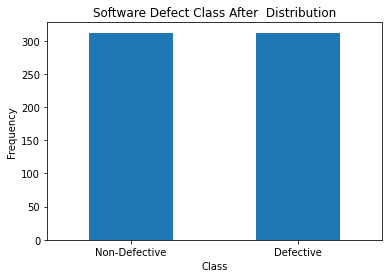

In [ ]:
count_classes = pd.value_counts(result['bug'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Software Defect Class After  Distribution")
LABELS = ["Non-Defective", "Defective"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
predicted = lr.predict(Xtrain)
print("Model Result after CIR")
print(classification_report(ytrain, predicted))


Model Result after CIR
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       312
         1.0       0.97      0.90      0.94       312

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Training Accuracy:",accuracy_score(ytrain,predicted))
print("Training Precision:",precision_score(ytrain,predicted))
print("Training Recall:",recall_score(ytrain,predicted))


Training Accuracy: 0.9391025641025641
Training Precision: 0.9724137931034482
Training Recall: 0.9038461538461539


## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto',C=1.0)
clf.fit(Xtrain,ytrain)
y_train_pred = clf.predict(Xtrain)
print("Training Accuracy:",accuracy_score(ytrain,y_train_pred))
print("Training Precision:",precision_score(ytrain,y_train_pred))
print("Training Recall:",recall_score(ytrain,y_train_pred))


Training Accuracy: 0.9967948717948718
Training Precision: 1.0
Training Recall: 0.9935897435897436


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtrain)
print("Training Accuracy:",accuracy_score(ytrain,y_pred))
print("Training Precision:",precision_score(ytrain,y_pred))
print("Training Recall:",recall_score(ytrain,y_pred))


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0


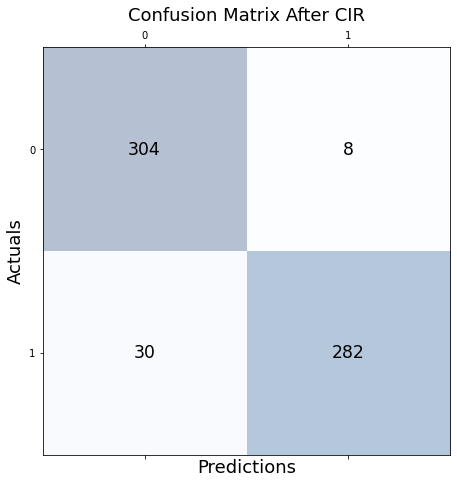

In [ ]:
conf_matrix = confusion_matrix(y_true=ytrain, y_pred=predicted)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix After CIR', fontsize=18)
plt.show()